In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

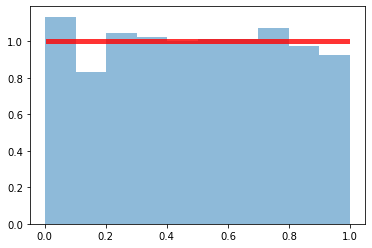

In [2]:
# generate samples
fix, ax = plt.subplots(1, 1)
r = uniform.rvs(loc=0, scale=1, size=1000)
# x：指定要绘制直方图的数据；输入值，这需要一个数组或者一个序列，不需要长度相同的数组。
# bins：指定直方图条形的个数；
# range：指定直方图数据的上下界，默认包含绘图数据的最大值和最小值；
# density：布尔,可选。如果"True"，返回元组的第一个元素将会将计数标准化以形成一个概率密度，也就是说，直方图下的面积（或积分）总和为1。density=ture的意思是保证该面积的积分为1，并不是概率和为1。这是通过将计数除以数字的数量来实现的观察乘以箱子的宽度而不是除以总数数量的观察。如果叠加也是“真实”的，那么柱状图被规范化为1。(替代normed)
# weights：该参数可为每一个数据点设置权重；
# cumulative：是否需要计算累计频数或频率；
# bottom：可以为直方图的每个条形添加基准线，默认为0；
# histtype：指定直方图的类型，默认为bar，除此还有’barstacked’, ‘step’, ‘stepfilled’；
# align：设置条形边界值的对其方式，默认为mid，除此还有’left’和’right’；
# orientation：设置直方图的摆放方向，默认为垂直方向；
# rwidth：设置直方图条形宽度的百分比；
# log：是否需要对绘图数据进行log变换；
# color：设置直方图的填充色；
# label：设置直方图的标签，可通过legend展示其图例；
# stacked：当有多个数据时，是否需要将直方图呈堆叠摆放，默认水平摆放；
# normed：是否将直方图的频数转换成频率；(弃用，被density替代)
# alpha：透明度，浮点数。
ax.hist(r, density=True, histtype='stepfilled', alpha=0.5)
#ppf(q, loc=0, scale=1) 百分比点函数(cdf的倒数—百分位数)。
# pdf(x, loc=0, scale=1)Probability density function. 概率密度函数
x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.8, label='uniform pdf') # lw: linewidth, alpha 透明度

In [3]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,6,5,4,3,2,1])
Mean = np.mean(x)

In [4]:
Var = np.var(x) # 默认总体方差
Var_unbias = np.var(x, ddof=1) # 样本方差（无偏方差）
Cov = np.cov(x, y)
Mean, Var, Var_unbias, Cov

(5.0,
 6.666666666666667,
 7.5,
 array([[ 7.5, -7.5],
        [-7.5,  7.5]]))

In [5]:
def plot_distribution(X, axes=None):
    """ 给定随机变量，绘制 PDF，PMF，CDF
        PDF：概率密度函数（probability density function）在数学中，连续型随机变量的概率密度函数是一个描述这个随机变量的输出值，在某个确定的取值点附近的可能性的函数。
        PMF : 概率质量函数（probability mass function), 在概率论中，概率质量函数是离散随机变量在各特定取值上的概率。
        CDF : 累积分布函数 (cumulative distribution function)，又叫分布函数，是概率密度函数的积分，能完整描述一个实随机变量X的概率分布
    """
    if axes is None:
        fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    x_min, x_max = X.interval(0.99)
    print(x_min, x_max)
    x = np.linspace(x_min, x_max, 1000)
    if hasattr(X.dist, 'pdf'): # 判断有没有 pdf，即是不是连续分布
        axes[0].plot(x, X.pdf(x), label="PDF")
        axes[0].fill_between(x, X.pdf(x), alpha=0.5) # alpha 是透明度，alpha=0 表示 100% 透明，alpha=100 表示完全不透明
    else: # 离散分布
        x_int = np.unique(x.astype(int))
        print(x.size)
        print(x_int)
        print(X.pmf(x_int), X.pmf(x_int).size)
        axes[0].bar(x_int, X.pmf(x_int), label="PMF") # pmf 和 pdf 是类似的
    print(X.cdf(x).size)
    axes[1].plot(x, X.cdf(x), label="CDF")
    for ax in axes:
        ax.legend()
    return axes

0.0 1.0
1000
[0 1]
[0.7 0.3] 2
1000


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

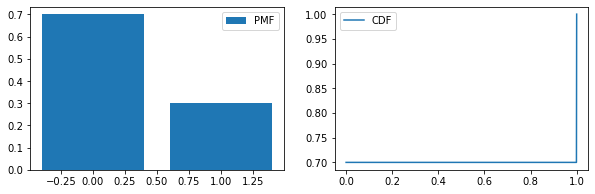

In [6]:
from scipy.stats import bernoulli
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) # 画布
p = 0.3
X = bernoulli(p) # 伯努利分布
plot_distribution(X, axes=axes)

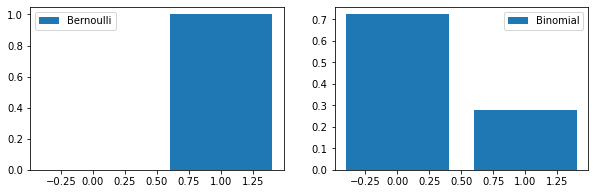

In [7]:
# 生成的概率
possibility = 0.3
def trials(n_samples):
    samples = np.random.binomial(n_samples, possibility)
    proba_zero = (n_samples - samples) / n_samples
    proba_one = samples / n_samples
    return [proba_zero, proba_one]

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
# 一次试验，伯努利分布
n_samples = 1
axes[0].bar([0, 1], trials(n_samples), label='Bernoulli')
# n次试验，二项分布
n_samples = 1000
axes[1].bar([0, 1], trials(n_samples), label='Binomial')
for ax in axes:
    ax.legend()

[0.38216139 0.5003298  0.17495636 0.2643175  0.60494872 0.67906618
 0.48432805 0.32259898 0.63212288 0.99687338]
5.041703240716516
res: [0.07580006 0.09923825 0.03470184 0.05242623 0.11998896 0.13468984
 0.09606437 0.06398611 0.12537883 0.19772552]
samples: [0 0 0 0 0 1 0 0 0 0]
1000 samples: [ 90 118  33  60 114 135  79  66 117 188]


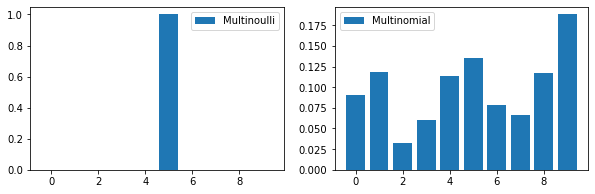

In [8]:
def k_possibilities(k):
    """
    随机产生一组 10 维概率向量
    """
    res = np.random.rand(k)
    print(res)
    _sum = sum(res)
    print(_sum)
    for i, x in enumerate(res):
        res[i] = x / _sum
    return res
    
fix, axes = plt.subplots(1, 2, figsize=(10, 3))
# 一次试验， 范畴分布
k, n_samples = 10, 1
res = k_possibilities(k)
print('res:', res)
samples = np.random.multinomial(n_samples, res, size=1)[0] # n_samples=1则只做一次试验，这次试验落在index=4位置，值为1。（若做两次试验则还会有一个值落在res其中一个）。若size=2是上述试验执行两次。返回两个数组。
print('samples:', samples)
axes[0].bar(range(len(samples)), samples / n_samples, label='Multinoulli')
# n次试验，多项式
n_samples = 1000
samples = np.random.multinomial(n_samples, res)
print('1000 samples:', samples)
axes[1].bar(range(len(samples)), samples / n_samples, label='Multinomial')
for ax in axes:
    ax.legend()

-2.5758293035489004 2.5758293035489004
1000


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

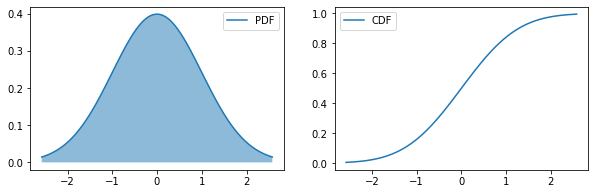

In [9]:
from scipy.stats import norm
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
mu, sigma = 0, 1
X = norm(mu, sigma) # 标准正态分布
plot_distribution(X, axes=axes)

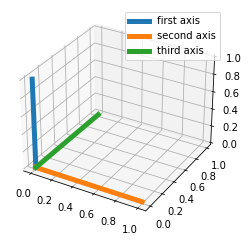

In [10]:
# 绘制多维数组拼接以及分割的三个轴方向，first axis为竖直方向，second axis为水平方向，third axis为深度方向
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure() 
ax = plt.axes(projection='3d')
x = [0, 0]
y = [0, 0]
z = [0, 1]
ax.plot(x, y, z, label='first axis', linewidth=5)
x = [0, 1]
y = [0, 0]
z = [0, 0]
ax.plot(x, y, z, label='second axis', linewidth=5)
x = [0, 0]
y = [0, 1]
z = [0, 0]
ax.plot(x, y, z, label='third axis', linewidth=5)
ax.legend()
# 绘制下三维度的图像，为了解释vstack hstack dstack

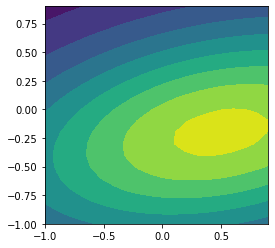

In [11]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
# np.mgrid[ 第1维，第2维 ，第3维 ， …] 每一维度，a:b:c，c表示步长，为实数表示间隔；该为长度为[a,b),左开右闭。a:b:cj，cj表示步长，为复数表示点数；该长度为[a,b]，左闭右闭
x, y = np.mgrid[-1:1:0.1, -1:1:0.1]
# vstack、hstack和dstack都用于把几个小数组合并成一个大数组。它们的差别是小数组的元素在大数组中的排列顺序有所不同。a、b二者在0号轴上连接起来。
# vstack垂直合并，a=[1,2] b=[3,4] np.vstack((a,b)) => [[1 2] [3 4]]
# hstack表示轴1合并。hstack的字母h来自于horizontal，表示两个数组是水平的，hstack((a,b))将把b排在a的右边的意思。
# np.hstack([[1,2],[3]]) => [1,2,3] 没有增维，结果不像vstack，对一维数组合并的结果还是一维的。
# a = [[1,2],
#      [3,4]]
# b = [[5],
#      [6]]
# print(np.hstack([a,b]))
# [[1 2 5]
#  [3 4 6]]
# dstack是说deep stack了，它是轴2合并。dstack([a,b])把a和b摞在一起，像一摞扑克牌一样。
# a = np.array([1,2]) b = np.array([3,4]) => np.dstack((a,b))
# [[[1 3]
#   [2 4]]]
pos = np.dstack((x, y))
fig = plt.figure(figsize=(4, 4))
axes = fig.add_subplot(111)
mu = [0.5, -0.2] # 均值
sigma = [[2.0, 0.3], [0.3, 0.5]] #协方差矩阵
X = multivariate_normal(mu, sigma)
axes.contourf(x, y, X.pdf(pos)) # contourf 画等高线和填充等高线

0.005012541823544286 5.298317366548035
1000


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

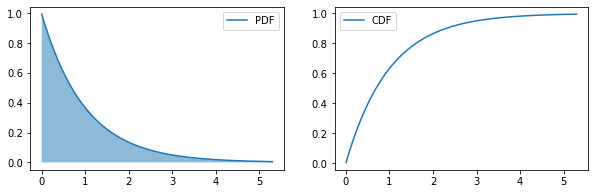

In [12]:
from scipy.stats import expon
fig, axes = plt.subplots(1, 2, figsize=(10, 3)) # 其中figsize=(a, b)用来设置图形的大小，a为图形的宽， b为图形的高
# 定义scale = 1 / lambda
X = expon(scale=1)
plot_distribution(X, axes=axes)

-4.605170185988091 4.605170185988091
1000


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

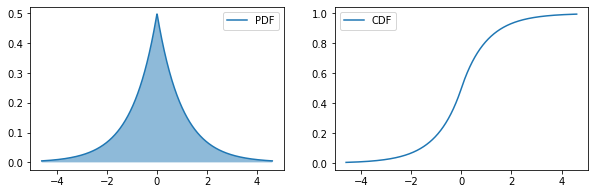

In [13]:
from scipy.stats import laplace
fix, axes = plt.subplots(1, 2, figsize=(10, 3))
mu, gamma = 0, 1
X = laplace(loc=mu, scale=gamma)
plot_distribution(X, axes=axes)

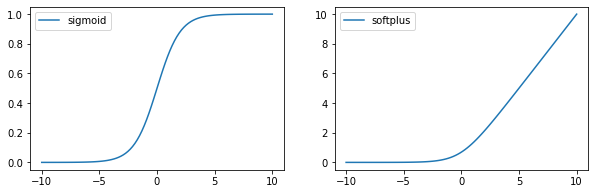

In [14]:
x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))
softplus = np.log(1 + np.exp(x))
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].plot(x, sigmoid, label='sigmoid')
axes[1].plot(x, softplus, label='softplus')
for ax in axes:
    ax.legend()

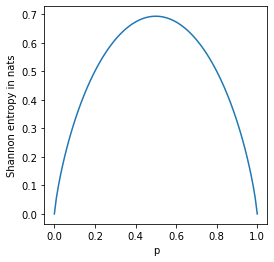

In [15]:
p = np.linspace(1e-6, 1-1e-6, 100)
entropy = (p - 1) * np.log(1 - p) - p * np.log(p)
plt.figure(figsize=(4, 4))
plt.plot(p, entropy)
plt.xlabel('p')
plt.ylabel('Shannon entropy in nats')
plt.show()

In [16]:
def H(sentence):
    """最优编码长度"""
    entropy = 0
    # 这里有 256 个可能的 ASCII 符号
    for character_i in range(256):
        Px = sentence.count(chr(character_i)) / len(sentence)
        if Px > 0:
            entropy += -Px * math.log(Px, 2)
    return entropy

In [17]:
import random
import math
simple_message = "".join([chr(random.randint(0, 64)) for i in range(500)])
print(simple_message)
H(simple_message)

-6?;> *)*8,@::7 :? :4,'-*;7=
#0! +. 504,#.: 33-9$ *9(!:	-/4):*74	48$7"'65!-"05#?:8+7= 6*7.:)66 !?5&8+9)>	!	"<-	*2$8>/'<!1#"?%<9  66#> /(<&59
?*4	)/6"	;!&0.1 *70
-?! /1!?1'	"4-?'7"6&
? '0755,+@&8;<)>$ 6?!9?


5.892272028117263

In [18]:
# KL 定义
from scipy.stats import entropy
def kl(p, q):
    """
    D(P||Q)
    """
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [19]:
# test
p = [0.1, 0.9]
q = [0.1, 0.9]
print(entropy(p, q) == kl(p, q), kl(p, q))

True 0.0


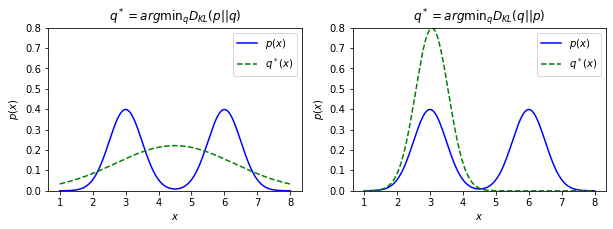

In [20]:
# D(P||Q) 与 D(Q||P) 比较
x = np.linspace(1, 8, 500)
y1 = norm.pdf(x, 3, 0.5) # normpdf：正态概率密度函数 Y = normpdf(X,mu,sigma)
y2 = norm.pdf(x, 6, 0.5)
p = y1 + y2 # 构造p(x)
# print(p)
KL_pq, KL_qp = [], []
q_list = []
for mu in np.linspace(0, 10, 50):
    for sigma in np.linspace(0.1, 5, 50): # 寻找最优的q(x)
        q = norm.pdf(x, mu, sigma)
        q_list.append(q)
        KL_pq.append(entropy(p, q))
        KL_qp.append(entropy(q, p))
KL_pq_min = np.argmin(KL_pq)
KL_qp_min = np.argmin(KL_qp)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].set_ylim(0, 0.8)
axes[0].plot(x, p / 2, 'b', label='$p(x)$')
axes[0].plot(x, q_list[KL_pq_min], 'g--', label='$q^*(x)$')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$p(x)$')
axes[0].set_title('$q^*={arg\min}_q D_{KL}(p||q)$')
axes[1].set_ylim(0, 0.8)
axes[1].plot(x, p/2, 'b', label='$p(x)$')
axes[1].plot(x, q_list[KL_qp_min], 'g--', label='$q^*(x)$')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$p(x)$')
axes[1].set_title('$q^*= {arg\min}_ q D_{KL}(q||p)$')
for ax in axes:
    ax.legend(loc='upper right')

In [27]:
import networkx as nx
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import matplotlib.pyplot as plt

验证模型数据的正确性: True


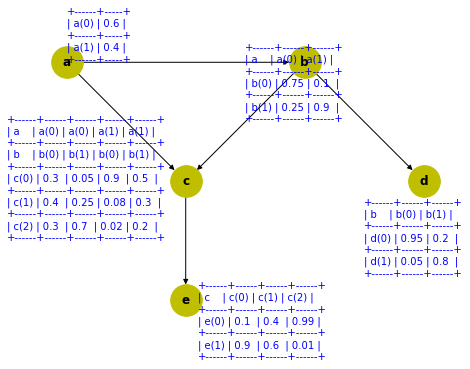

In [30]:
# 建立一个简单贝叶斯模型框架
model = BayesianModel([('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('c', 'e')])
# 最顶层的父节点的概率分布表
cpd_a = TabularCPD(variable='a', variable_card=2, values=[[0.6], [0.4]]) # a: (0,1)
# 其它各节点的条件概率分布表（行对应当前节点索引，列对应父节点索引）
cpd_b = TabularCPD(variable='b', variable_card=2, # b: (0,1)
                values=[[0.75, 0.1],
                        [0.25, 0.9]],
                evidence=['a'],
                evidence_card=[2])
cpd_c = TabularCPD(variable='c', variable_card=3, # c: (0,1,2)
                values=[[0.3, 0.05, 0.9, 0.5],
                        [0.4, 0.25, 0.08, 0.3],
                        [0.3, 0.7, 0.02, 0.2]],
                evidence=['a', 'b'],
                evidence_card=[2, 2])
cpd_d = TabularCPD(variable='d', variable_card=2, # d: (0,1)
                values=[[0.95, 0.2],
                        [0.05, 0.8]],
                evidence=['b'],
                evidence_card=[2])
cpd_e = TabularCPD(variable='e', variable_card=2, # e: (0,1)
                values=[[0.1, 0.4, 0.99],
                        [0.9, 0.6, 0.01]],
                evidence=['c'],
                evidence_card=[3])
# 将各节点的概率分布表加入网络
model.add_cpds(cpd_a, cpd_b, cpd_c, cpd_d, cpd_e)
# 验证模型数据的正确性
print(u"验证模型数据的正确性:",model.check_model())
# 绘制贝叶斯图 (节点 + 依赖关系)
nx.draw(model, with_labels=True, node_size=1000, font_weight='bold', node_color='y', pos={"e":[4,3],"c":[4,5],"d":[8,5],"a":[2,7],"b":[6,7]})
plt.text(2,7,model.get_cpds("a"), fontsize=10, color='b')
plt.text(5,6,model.get_cpds("b"), fontsize=10, color='b')
plt.text(1,4,model.get_cpds("c"), fontsize=10, color='b')
plt.text(4.2,2,model.get_cpds("e"), fontsize=10, color='b')
plt.text(7,3.4,model.get_cpds("d"), fontsize=10, color='b')
plt.show()

验证模型数据的正确性: True


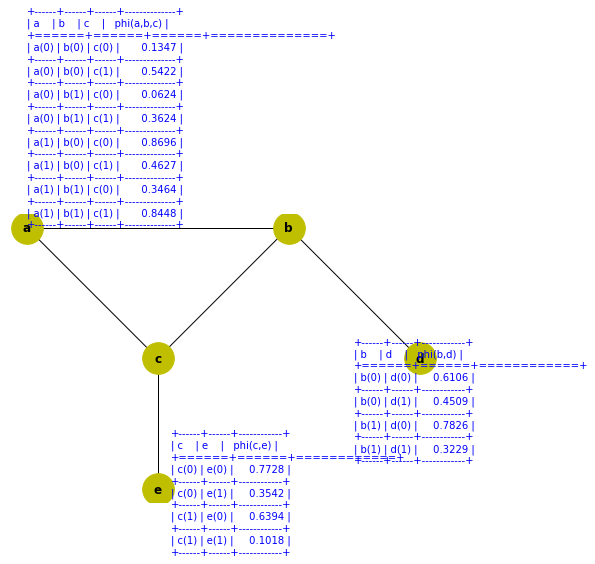

In [31]:
import networkx as nx
from pgmpy.models import MarkovModel
from pgmpy.factors.discrete import DiscreteFactor
import matplotlib.pyplot as plt

# 建立一个简单马尔科夫网
model = MarkovModel([('a', 'b'), ('a', 'c'), ('b', 'c'),('b', 'd'), ('c', 'e')])
# 各团因子 (参数随机选择)
factor_abc = DiscreteFactor(['a', 'b', 'c'], cardinality=[2,2,2], values=np.random.rand(8))
factor_bd = DiscreteFactor(['b', 'd'], cardinality=[2,2], values=np.random.rand(4))
factor_ce = DiscreteFactor(['c', 'e'], cardinality=[2,2], values=np.random.rand(4))
# 将各团因子加入网络
model.add_factors(factor_abc,factor_bd,factor_ce)
# 验证模型数据的正确性
print(u"验证模型数据的正确性:",model.check_model())
# # 绘制贝叶斯图 (节点 + 依赖关系)
nx.draw(model, with_labels=True, node_size=1000, font_weight='bold', node_color='y', \
pos={"e":[4,3],"c":[4,5],"d":[8,5],"a":[2,7],"b":[6,7]})
plt.text(2,7,model.get_factors()[0], fontsize=10, color='b')
plt.text(7,3.4,model.get_factors()[1], fontsize=10, color='b')
plt.text(4.2,2,model.get_factors()[2], fontsize=10, color='b')
plt.show()

In [32]:
import numpy, scipy, matplotlib, networkx, pgmpy
print("numpy:", numpy.__version__)
print("scipy:", scipy.__version__)
print("matplotlib:", matplotlib.__version__)
print("networkx:", networkx.__version__)
print("pgmpy:", pgmpy.__version__)

numpy: 1.19.2
scipy: 1.5.2
matplotlib: 3.3.2
networkx: 2.5
pgmpy: 0.1.13
